In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from isaac.visualization import plot_lineplot_with_paper_style

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
directory = "r_theta/"
stats = pd.read_hdf(directory+"stats.h5")

In [4]:
stats.head()

,Epoch,Mass Loss,Force Loss,Mass Train Accuracy,Mass Val Accuracy,Force Train Accuracy,Force Val Accuracy,seed
0,0,1.104113,1.091973,34.142857,33.5,38.057143,36.6,0
1,1,1.100623,1.042733,33.314286,31.1,51.142857,52.5,0
2,2,1.100920,0.987152,34.114286,33.5,52.571429,52.7,0
3,3,1.095889,0.905005,36.142857,34.4,54.857143,55.3,0
4,4,1.091749,0.852764,36.371429,35.1,55.428571,56.7,0


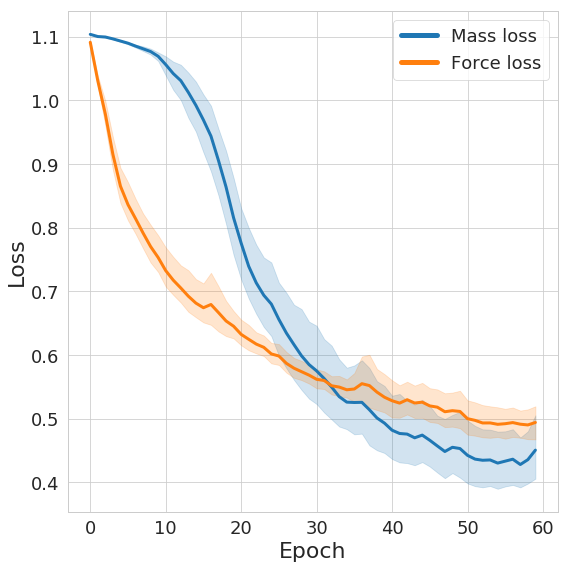

In [5]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Loss", data=stats, label="Mass loss")
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Loss", data=stats, ax=ax, label="Force loss")
plt.ylabel("Loss")
plt.savefig(directory+"losses.pdf")

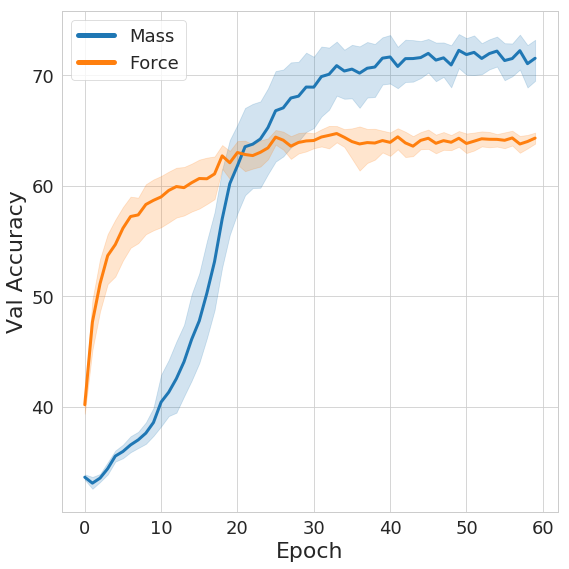

In [6]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Val Accuracy", data=stats, label="Mass")
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Val Accuracy", data=stats, ax=ax, label="Force")
plt.ylabel("Val Accuracy")
plt.savefig(directory+"val_accuracies.pdf")

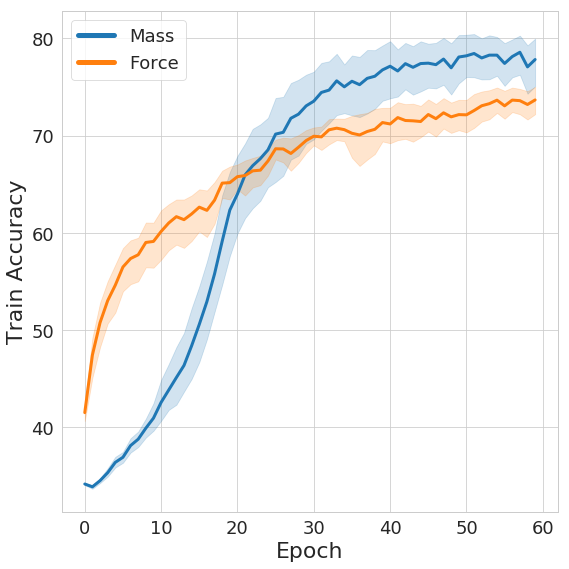

In [7]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Train Accuracy", data=stats, label="Mass")
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Train Accuracy", ax=ax, data=stats, label="Force")
plt.ylabel("Train Accuracy")
plt.savefig(directory+"train_accuracies.pdf")

# Comparison with model trained using vx and vy ("rectangular")

In [8]:
mass_accuracies = []
force_accuracies = []

for seed, seed_df in stats.groupby("seed"):
    mass_accuracies.append(seed_df["Mass Val Accuracy"].max())
    force_accuracies.append(seed_df["Force Val Accuracy"].max())

print("Mass:", np.mean(mass_accuracies), np.std(mass_accuracies), np.max(mass_accuracies))
print("Force:", np.mean(force_accuracies), np.std(force_accuracies), np.max(force_accuracies))

Mass: 74.844 2.3628931418919485 78.2
Force: 66.836 1.01306663156971 68.3


In [9]:
directory = "seq_length_and_res_plots/"
rec_stats = pd.read_hdf(directory+"stats.h5")
rec_stats = rec_stats.query("step_size == 3 and seq_start == 0")

In [10]:
rec_mass_accuracies = []
rec_force_accuracies = []

for seed, seed_df in rec_stats.groupby("seed"):
    rec_mass_accuracies.append(seed_df["Mass Val Accuracy"].max())
    rec_force_accuracies.append(seed_df["Force Val Accuracy"].max())

print("Mass:", np.mean(rec_mass_accuracies), np.std(rec_mass_accuracies), np.max(rec_mass_accuracies))
print("Force:", np.mean(rec_force_accuracies), np.std(rec_force_accuracies), np.max(rec_force_accuracies))

Mass: 66.06666666666666 1.1115554667022025 67.6
Force: 66.10000000000001 3.1843366656181313 68.5


In [11]:
from isaac.statistical_tests import is_best_model_significantly_better

In [12]:
is_best_model_significantly_better([("polar", mass_accuracies), ("rectangular", rec_mass_accuracies)])
is_best_model_significantly_better([("polar", force_accuracies), ("rectangular", rec_force_accuracies)])

polar is significantly better than the rest
polar not significantly better than rectangular 0.4195566517393461
